# Speed of Light

In [1]:
import polars as pl
from loguru import logger
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data = pl.read_csv("example1.csv")
except Exception as e:
    logger.error(e)
    data = pl.DataFrame(
        {
            "speed": [
                28,
                26,
                33,
                24,
                34,
                -44,
                27,
                16,
                40,
                -2,
                29,
                22,
                24,
                21,
                25,
                30,
                23,
                29,
                31,
                19,
                24,
                20,
                36,
                32,
                36,
                28,
                25,
                21,
                28,
                29,
                37,
                25,
                28,
                26,
                30,
                32,
                36,
                26,
                30,
                22,
                36,
                23,
                27,
                27,
                28,
                27,
                31,
                27,
                26,
                33,
                26,
                32,
                32,
                24,
                39,
                28,
                24,
                25,
                32,
                25,
                29,
                27,
                28,
                29,
                16,
                23,
            ]
        }
    )
    data.write_csv("example1.csv")

data.head()

speed
i64
28
26
33
24
34


In [3]:
with pm.Model() as m:
    mu = pm.Normal("mu", mu=0.0, sigma=5.0)
    sigma = pm.HalfNormal("sigma", sigma=3.0)
    speed = pm.Normal("speed", mu=mu, sigma=sigma, observed=data["speed"].to_list())

    trace = pm.sample(2000, tune=1000)
    posterior = pm.sample_posterior_predictive(trace=trace)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Sampling: [speed]


Output()

In [4]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,24.676,1.225,22.439,27.005,0.014,0.015,7869.0,5660.0,1.0
sigma,10.145,0.783,8.658,11.586,0.009,0.009,8011.0,6179.0,1.0


The "true" value for $\mu$ is 33.0. What is the 95% confidence interval?

In [5]:
np.percentile(
    trace.posterior["mu"].mean("chain"),
    [2.5, 97.5],
)

array([23.47406252, 25.90495002])

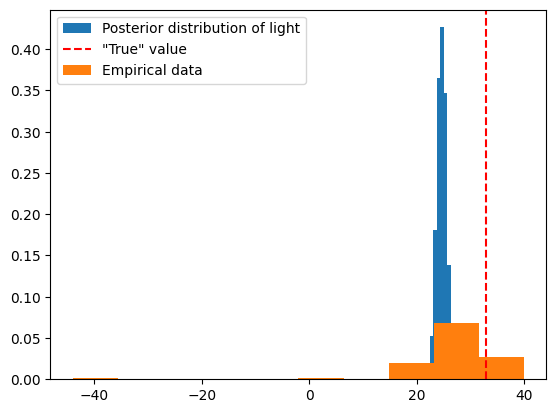

In [6]:
plt.hist(
    posterior.posterior_predictive["speed"].mean(("chain", "speed_dim_0")),
    density=True,
    label="Posterior distribution of light",
)

plt.axvline(33.0, linestyle="--", color="red", label='"True" value')
plt.hist(data["speed"], density=True, label="Empirical data")
plt.legend()
plt.show()